# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [31]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Angela\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
pip install newsapi-python

In [61]:
# Read your api key environment variable
load_dotenv("news_api_key.env")
api_key = os.getenv("news_api_key")

In [62]:
print(api_key)

ff8564cc180f4dc4bc927634aafd2411


In [63]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
                    

In [64]:
newsapi = NewsApiClient(api_key=api_key)  


In [81]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)
btc_headlines

{'status': 'ok',
 'totalResults': 7924,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Gian M. Volpicelli',
   'title': 'As Kazakhstan Descends into Chaos, Crypto Miners Are at a Loss',
   'description': 'The central Asian country became No. 2 in the world for Bitcoin mining. But political turmoil and power cuts have hit hard, and the future looks bleak.',
   'url': 'https://www.wired.com/story/kazakhstan-cryptocurrency-mining-unrest-energy/',
   'urlToImage': 'https://media.wired.com/photos/61de2d453e654a13e9a16ef0/191:100/w_1280,c_limit/Business_Kazakhstan-2HDE52K.jpg',
   'publishedAt': '2022-01-12T12:00:00Z',
   'content': 'When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Mitchell Clark',
   'title': 'The International Mon

In [82]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)
eth_headlines

{'status': 'ok',
 'totalResults': 3798,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Corin Faife',
   'title': 'Crypto.com admits over $30 million stolen by hackers',
   'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
   'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
   'publishedAt': '2022-01-20T13:23:31Z',
   'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author

In [83]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
3,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
4,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000


In [84]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962
4,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877


In [85]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.050560,0.062550,0.037900,0.899550
std,0.376771,0.061657,0.043444,0.063682
min,-0.440400,0.000000,0.000000,0.765000
25%,-0.331550,0.000000,0.000000,0.866250
50%,0.038600,0.054000,0.000000,0.914500
75%,0.328950,0.106750,0.083250,0.934000
max,0.680800,0.185000,0.101000,1.000000


In [86]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.155615,0.065200,0.019000,0.915800
std,0.322773,0.063741,0.044849,0.079075
min,-0.680800,0.000000,0.000000,0.775000
25%,0.000000,0.000000,0.000000,0.875500
50%,0.089950,0.051500,0.000000,0.927000
75%,0.406800,0.106000,0.000000,1.000000
max,0.757900,0.217000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [ ]:
Ethereum has the highest mean positive scoring at 0.065200 

In [ ]:
Ethereum has the highest compound scoring at 0.757900

In [ ]:
Ethereum has the highest positive scoring at 0.217000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [111]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [205]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {
    "Reuters",
    "reuters",
    "Getty Images",
    "Getty",
    "AP",
    "Dec",
    "Nov",
    "char",
    "ha",
    "day",
    "dec",
    "wa",
    "charswhat"
}
print(sw.union(sw_addon))



{'does', 'what', 'out', 'a', 'wa', 'no', 'have', 'itself', 'not', "you've", 'its', 'between', 'an', 'ma', 'mightn', 'Nov', 'into', 'will', 'mustn', "didn't", 'whom', "you'll", 'yourself', 'd', 'wasn', 'charswhat', 'did', 'during', 'own', 'had', 'they', 'being', 'our', 'of', 'them', 'it', 'once', 'with', 'don', 'off', 'the', 'only', 'weren', 'about', 'few', 'herself', 'didn', 'as', 'his', 'doesn', "hasn't", "you're", 'there', 'are', "isn't", "wasn't", 'doing', 'o', 'further', 'y', 'she', 'from', 'some', 't', 'up', 'if', 'nor', 'dec', 'Getty Images', 'when', 'Dec', 'after', "couldn't", 'your', "that'll", 'but', 'these', 'isn', "hadn't", "shouldn't", 'char', "aren't", 'so', 'for', 'to', 's', "she's", 'how', 'her', 'you', "it's", "mustn't", 'day', 'couldn', 'at', 'wouldn', 'were', 'Getty', 'm', "shan't", 'themselves', 'again', 'yours', 'myself', 'any', 'theirs', 'very', 'too', 'through', 've', 'before', 'me', 'hadn', 'ain', 'this', 'has', 'him', 'by', 'each', 'other', 'shouldn', 'won', 'he

In [208]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
          
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lower = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word for word in lower if word not in sw.union(sw_addon)]

    return tokens

In [211]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000,"[denis, rusinovich, set, cryptocurrency, minin..."
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
2,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
3,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
4,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."


In [212]:
# Create a new tokens column for Ethereum
eth["tokens"] = btc.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[denis, rusinovich, set, cryptocurrency, minin..."
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000,"[el, salvador, introduced, bitcoin, legal, ten..."
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"[officially, building, open, bitcoin, mining, ..."
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962,"[israeli, national, tal, prihar, pled, guilty,..."
4,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877,"[new, blog, post, company, said, eth, bitcoin,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [194]:
from collections import Counter
from nltk import ngrams

In [214]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('bitcoin', 'mining'), 4),
 (('alex', 'castro'), 3),
 (('building', 'open'), 3),
 (('open', 'bitcoin'), 3),
 (('mining', 'system'), 3),
 (('blog', 'post'), 3),
 (('alongside', 'us'), 2),
 (('illustration', 'alex'), 2),
 (('international', 'monetary'), 2),
 (('officially', 'building'), 2),
 (('raedlegetty', 'imagesblock'), 2),
 (('castro', 'vergein'), 2),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('el', 'salvador'), 2),
 (('denis', 'rusinovich'), 1),
 (('rusinovich', 'set'), 1),
 (('set', 'cryptocurrency'), 1),
 (('cryptocurrency', 'mining'), 1)]

In [215]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('blog', 'post'), 3),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('according', 'new'), 2),
 (('york', 'city'), 2),
 (('charsto', 'believers'), 2),
 (('believers', 'open'), 2),
 (('open', 'public'), 2),
 (('public', 'blockchains'), 2),
 (('blockchains', 'provide'), 2),
 (('provide', 'second'), 2),
 (('second', 'chance'), 2),
 (('chance', 'building'), 2),
 (('building', 'digital'), 2),
 (('digital', 'economy'), 2),
 (('economy', 'fact'), 2),
 (('fact', 'application'), 2),
 (('application', 'built'), 2),
 (('built', 'top'), 2)]

In [216]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [217]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)


[('bitcoin', 14),
 ('company', 9),
 ('cryptocurrency', 8),
 ('mining', 7),
 ('new', 7),
 ('open', 5),
 ('building', 4),
 ('salvador', 3),
 ('us', 3),
 ('alex', 3)]

In [218]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('cryptocurrency', 9),
 ('ethereum', 7),
 ('new', 6),
 ('company', 5),
 ('bitcoin', 4),
 ('million', 4),
 ('digital', 4),
 ('blockchains', 4),
 ('blog', 3),
 ('post', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [219]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [220]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 33, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

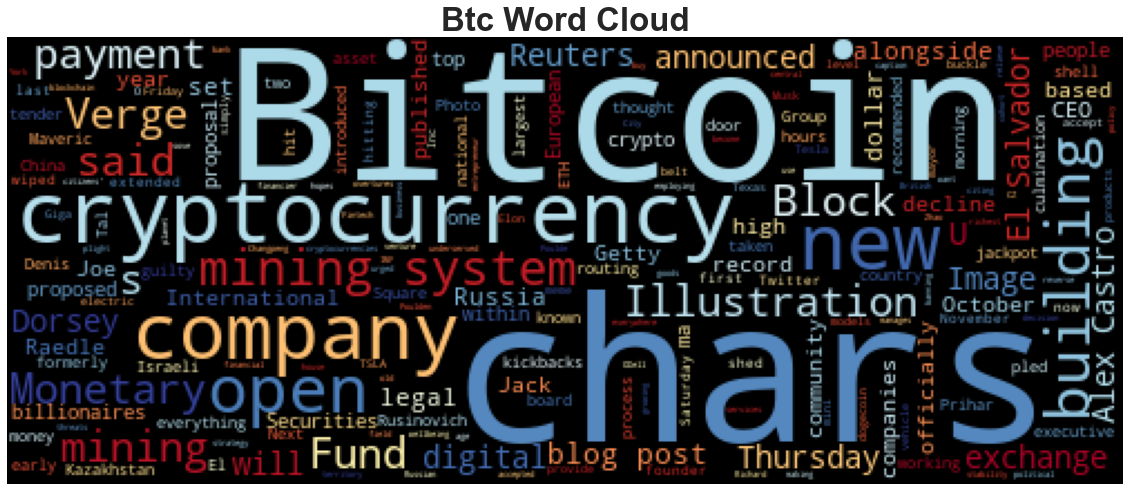

In [221]:
wordcloud(btc.text.str.cat(), title="Btc Word Cloud")

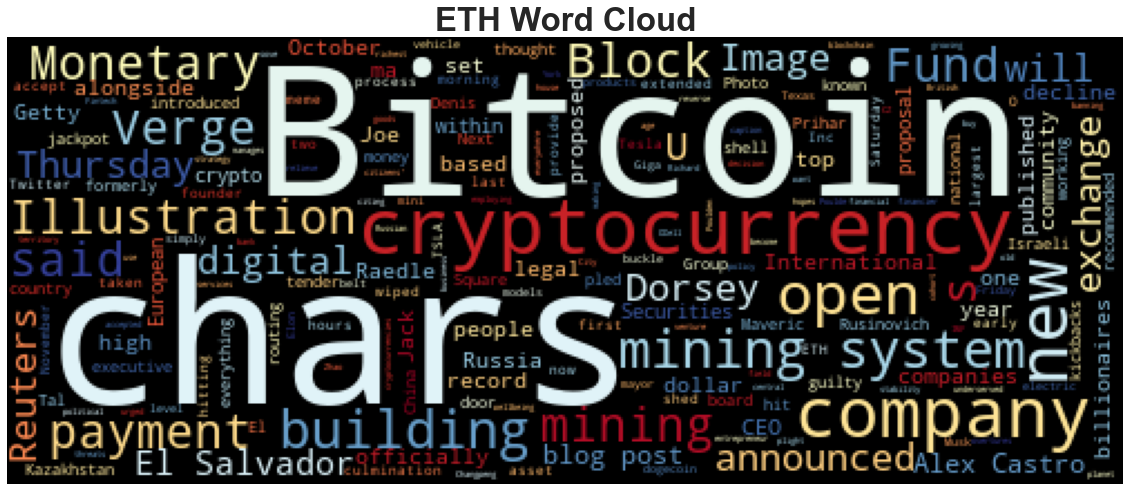

In [222]:
# Generate the Ethereum word cloud
wordcloud(btc.text.str.cat(), title="ETH Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [223]:
import spacy
from spacy import displacy

In [224]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [225]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [226]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars]El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars]Were officially building an open Bitcoin mining system\r\nPhoto by Joe Raedle/Getty Images\r\nBlock, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars]Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars]In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a b

In [227]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Btc NER"

In [229]:
# Render the visualization
displacy.render(doc, style= "ent", jupyter=True)

In [233]:
# List all Entities
for ent in doc.ents:
    
    print(ent.text, ent.label_)

Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
chars]El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
chars]Russia GPE
Thursday DATE
Russian NORP
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Changpeng PERSON
Binance PERSON
Reuters ORG
Jan 26 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Thursday DAT

---

### Ethereum NER

In [234]:
# Concatenate all of the Ethereum text together
all_eth_text = eth.text.str.cat()
all_eth_text

'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]Hackers who made off with roughly $15 million in ethereum from Crypto.com are attempting to launder the funds through a so-called ethereum mixer, known as Tornado Cash, according to a new report from… [+3891 chars]On some level, the new mayor is simply employing an age-old political strategy: making overtures to the business community. Fintech is a growing field in New York City, and blockchain-based companies… [+1562 chars]Back in September\r\n, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the beta to a small number of people before expanding availa… [+1069 chars]Trading platform Crypto.com lost about $34 million worth of cryptocurrency in a hack on Monday, according to a new blog post by the compa

In [237]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "ETH NER"

In [238]:
# Render the visualization
displacy.render(doc, style= "ent", jupyter=True)

In [239]:
# List all Entities
for ent in doc.ents:
    
    print(ent.text, ent.label_)

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
roughly $15 million MONEY
Crypto.com ORG
Tornado Cash PERSON
Fintech ORG
New York City GPE
September DATE
Robinhood ORG
Crypto.com ORG
about $34 million MONEY
Monday DATE
Ethereum ORG
Ethereum GPE
418% PERCENT
2021 DATE
AMC Entertainment ORG
AMC ORG
GME ORG
Ethereums ORG
more than 650% PERCENT
Vitalik Buterin PERSON
Ethereum ORG
OPEN ORG
second ORDINAL
OPEN ORG
second ORDINAL
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
chars]In PERSON
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
4 CARDINAL
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
TIME ORG
weekly DATE
Vita ORG
c

---